In [1]:
import pandas as pd

df = pd.read_csv('../data_files/loan_data_set.csv')
df



,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Loan_Status']


0      0
1      1
2      1
3      1
4      1
      ..
475    1
476    1
477    1
478    1
479    0
Name: Loan_Status, Length: 480, dtype: int64

In [3]:
features = df[['ApplicantIncome', 'Credit_History', 'LoanAmount','Loan_Amount_Term']]
target = df[['Loan_Status']]

In [4]:
features

,ApplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
0,4583,1.0,128.0,360.0
1,3000,1.0,66.0,360.0
2,2583,1.0,120.0,360.0
3,6000,1.0,141.0,360.0
4,5417,1.0,267.0,360.0
...,...,...,...,...
475,2900,1.0,71.0,360.0
476,4106,1.0,40.0,180.0
477,8072,1.0,253.0,360.0
478,7583,1.0,187.0,360.0


In [5]:
target

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
475,1
476,1
477,1
478,1


In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2)

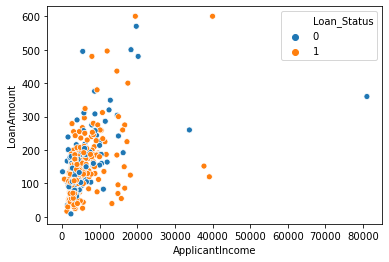

In [7]:
from sklearn.svm import SVC
import seaborn as sns
sns.scatterplot(hue='Loan_Status', y='LoanAmount',x='ApplicantIncome', data =df)

In [8]:
model = SVC(kernel='poly')
model.fit(xtrain,ytrain)

/home/akhil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='poly')

In [9]:
arr=model.predict(xtest)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,arr)

0.71875

In [12]:
sum([72.9,68.7,71.8])/3

71.13333333333334